# Simple Linear Regression Analysis
### Is there a linear relationship between water salinity and temperature?

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

## Data

In [2]:
#Load data from csv file and create a dataframe with only temperature and salinity columns
df = pd.read_csv('bottle.csv', low_memory=False)

#print(df.head())

Temp_Salinity = df[['T_degC', 'Salnty']]
Temp_Salinity.columns = ['Temperature', 'Salinity']
print(Temp_Salinity.head())

   Temperature  Salinity
0        10.50    33.440
1        10.46    33.440
2        10.46    33.437
3        10.45    33.420
4        10.45    33.421


In [3]:
#Check for and remove null values
missing_values = Temp_Salinity.isnull().sum()
print("Number of Null Values:")
print(Temp_Salinity.isnull().sum())
print()
Temp_Salinity = Temp_Salinity.dropna(how='any', axis=0)
print(Temp_Salinity.info())
print()
print("Number of Null Values:")
print(Temp_Salinity.isnull().sum())

Number of Null Values:
Temperature    10963
Salinity       47354
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Temperature  814247 non-null  float64
 1   Salinity     814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB
None

Number of Null Values:
Temperature    0
Salinity       0
dtype: int64


## Initial analysis
#### Correlation, R Squared, and Slope

In [4]:


Temp = Temp_Salinity.Temperature
Sal = Temp_Salinity.Salinity

corr, _ = stats.pearsonr(Temp, Sal)

slope, intercept, r_value, p_value, stderr = stats.linregress(Temp, Sal)
r_value_squared = r_value**2

print("Correlation Value:", corr)
print("R Squared:", r_value_squared)
print("Slope:", slope)

Correlation Value: -0.5052659661915682
R Squared: 0.2552936965915028
Slope: -0.05520775200529122



The absolute value of Pearson's Correlation Coefficientis 0.5, indicating that the two variables are correlated in some way. The slope is -0.055, suggesting a small negative linear correlation. However, the R squared value is 0.255, a very low value. This indicates the data will not fit with the linear equation.

#### Simple Linear Regression

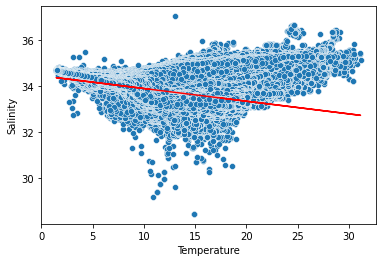

slope, intercept: (-0.0552077520052908, 34.440909110040025)
R Squared: 0.2552936965915028


In [5]:
#Plot Temperature Vs. Salinity to see any trends and if linear regression is appropriate
Temp = Temp.values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(Temp, Sal)
m = regr.coef_[0]
b = regr.intercept_
Sal_prediction = regr.predict(Temp)

sns.scatterplot(data=Temp_Salinity, x='Temperature', y='Salinity')
plt.plot(Temp, Sal_prediction, color='red')
plt.show()

print("slope, intercept:", (m, b))
print("R Squared:", r_value_squared)

#### Conclusion
The plot shows that the linear equation is a poor fit to the data. The R squared value, 0.26, supports this observation. The correlation coefficient is 0.51, suggesting there is a correlation between temperature and salinity in water, though it is not strongly linear. Simple, first order linear regression is not an appropriate method to model relationship between the temperature and salinity of water.